In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.metrics import r2_score


from sklearn.linear_model import LinearRegression

In [3]:
data = pd.read_csv('titanic.csv',usecols=['Fare','Age','Survived'])

In [4]:
data['Age'].fillna(np.mean(data['Age']),inplace=True)
data['Fare'].fillna(np.mean(data['Fare']),inplace=True)

In [5]:
data.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [6]:
x=data[['Age','Fare']]
y=data['Survived']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

/tmp/ipykernel_6281/401033433.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=X_train["Age"], shade=True)


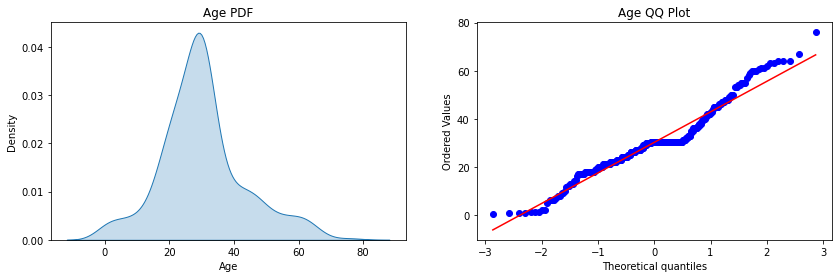

In [8]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(data=X_train["Age"], shade=True)
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(X_train['Age'], dist="norm", plot=plt)
plt.title('Age QQ Plot')

plt.show()


/tmp/ipykernel_6281/2052573646.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=x["Fare"], shade=True)


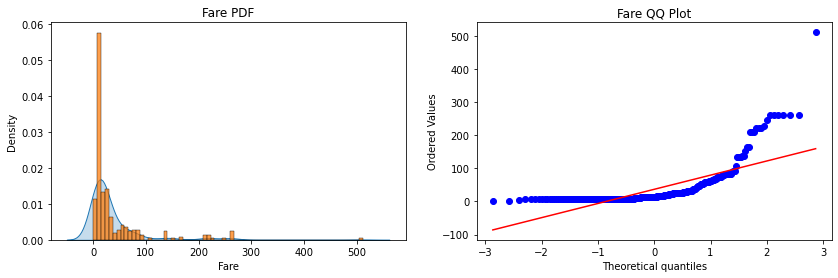

In [10]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(data=x["Fare"], shade=True)
sns.histplot(X_train["Fare"],stat="density")
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(X_train['Fare'], dist="norm", plot=plt)
plt.title('Fare QQ Plot')

plt.show()

In [11]:
from sklearn.preprocessing import PowerTransformer

In [15]:
# Apply Yeo-Johnson transform

pt1 = PowerTransformer()

X_train_transformed2 = pt1.fit_transform(X_train)
X_test_transformed2 = pt1.transform(X_test)

lr = LinearRegression()
lr.fit(X_train_transformed2,y_train)

y_pred3 = lr.predict(X_test_transformed2)

print(r2_score(y_test,y_pred3))

pd.DataFrame({'cols':X_train.columns,'Yeo_Johnson_lambdas':pt1.lambdas_})

0.02976672858226237


,cols,Yeo_Johnson_lambdas
0,Age,0.772374
1,Fare,-0.253670
